#  Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month.
#   Our main objective is to predict the stock’s closing price of the month.

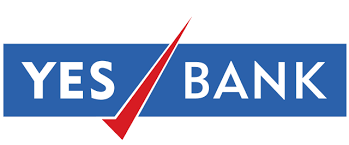

**Loading the Libraries and data**



In [ ]:
# importing the libraries we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA

from dateutil.relativedelta import relativedelta       # working with dates with style




import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google drive 
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
# Loading the given data set
df = pd.read_csv('/content/drive/MyDrive/Yes bank stock Prediction/data_YesBank_StockPrices.csv')


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


Features present in the data set :-


*   Date :- The date (Month and Year provided)
*Open :- The price of the stock at the beginning of a particular time period.
*High :-The Peak(Maximum) price at which a stock traded during the period.
*Low :-The Lowest price at which a stock traded during the period.
*Close :- The trading price at the end (in this case end of the month).

In [ ]:
df.shape

(185, 5)

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# Data Cleaning

In [ ]:
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.describe(include='all')


,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
df['Date'] 


0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [ ]:
#Seperating dependent and independent variable
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)


['Date', 'Open', 'High', 'Low']
['Close']


In [ ]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df.head()


,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


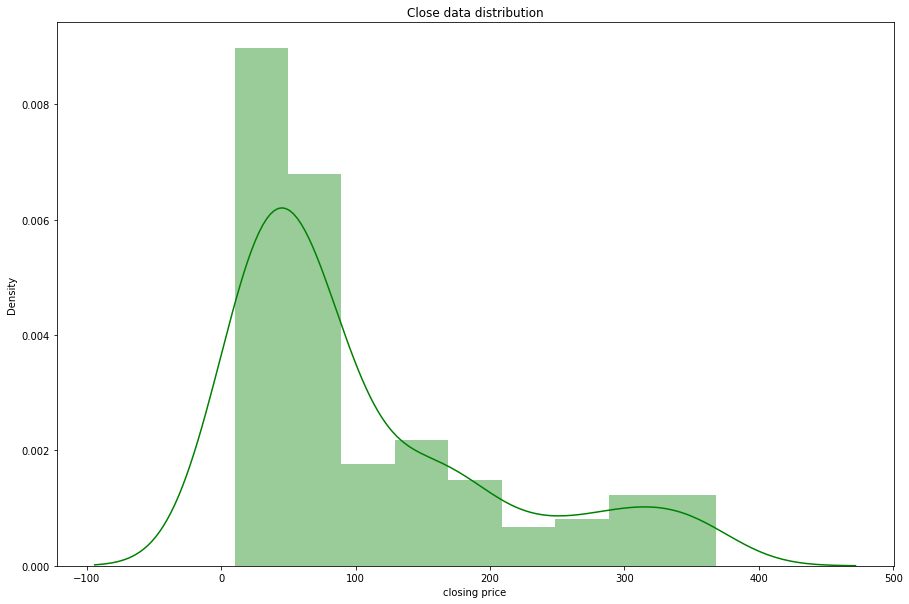

In [ ]:
plt.figure(figsize= (15,10))
sns.distplot(df['Close'], color = 'g')
plt.title('Close data distribution')
plt.xlabel('closing price')
plt.show()

In [ ]:
import plotly.express as px                       

fig = px.line(df, df['Date'], df['Close'], title='Yearly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1200,
    height=500)

fig.show()

We can see that stock price is raising till 2018 but later declining due to fraud case.

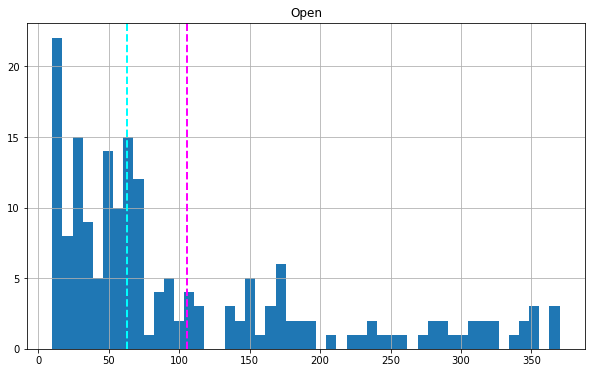

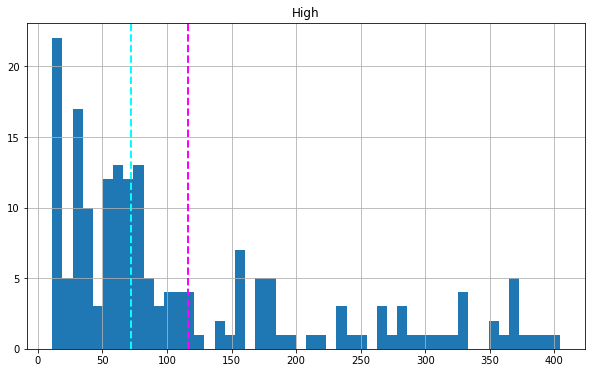

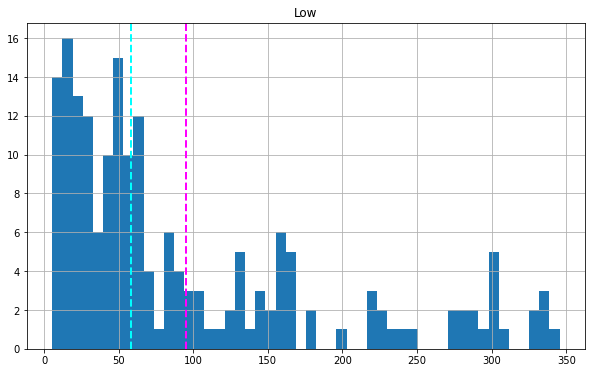

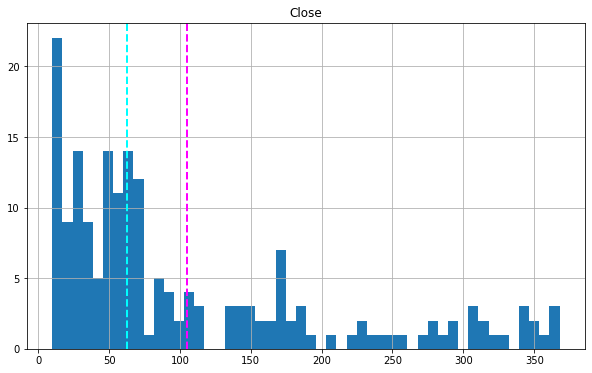

In [ ]:
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

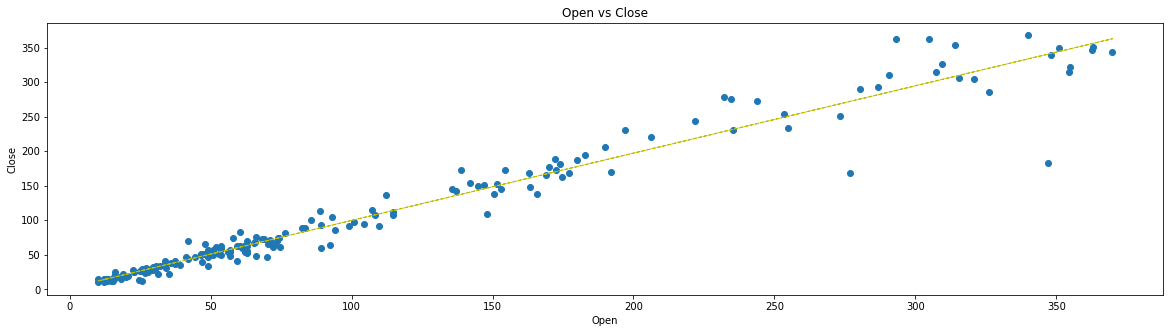

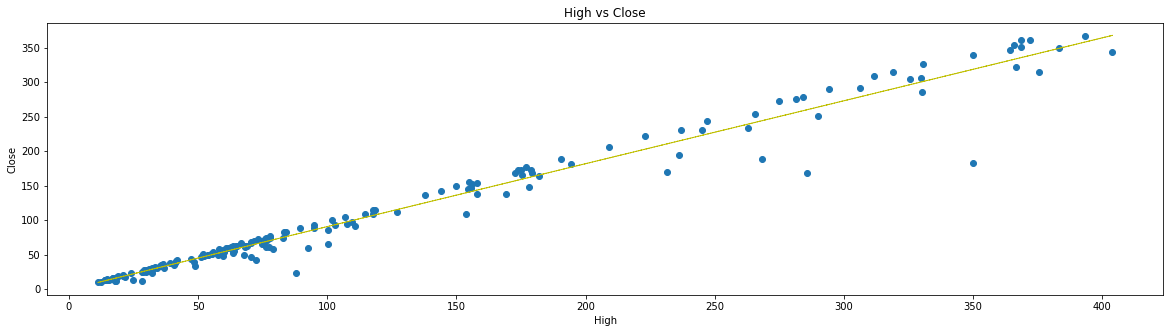

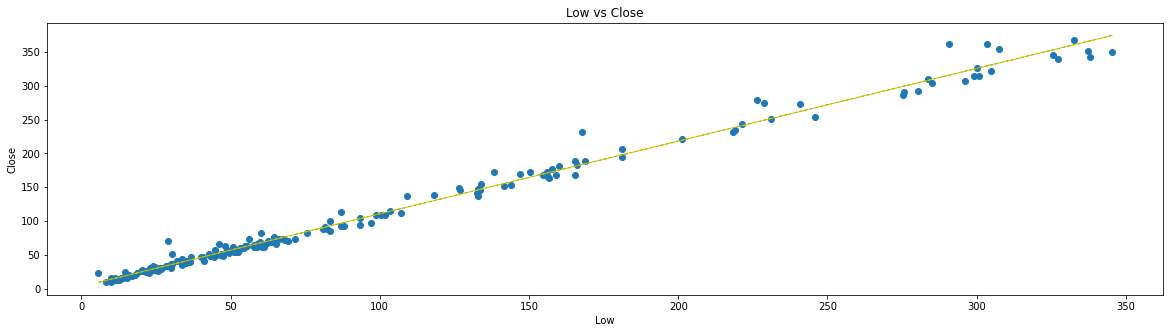

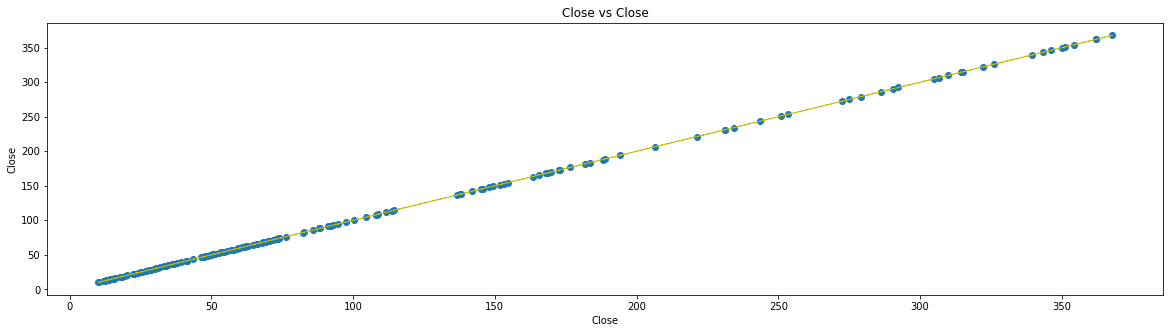

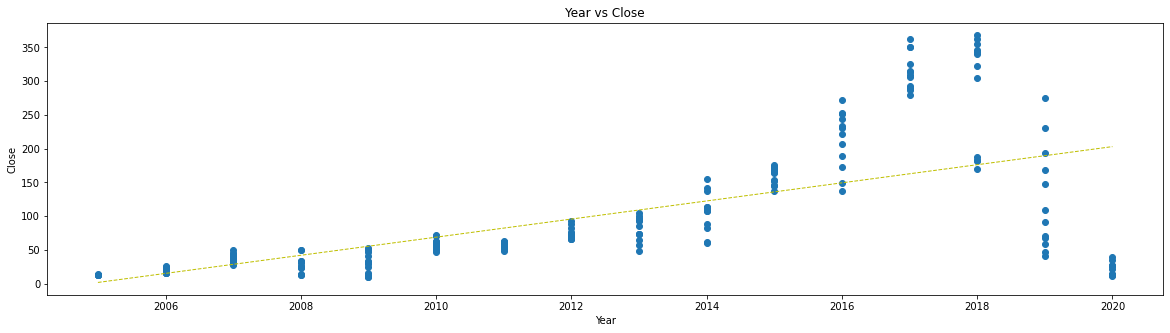

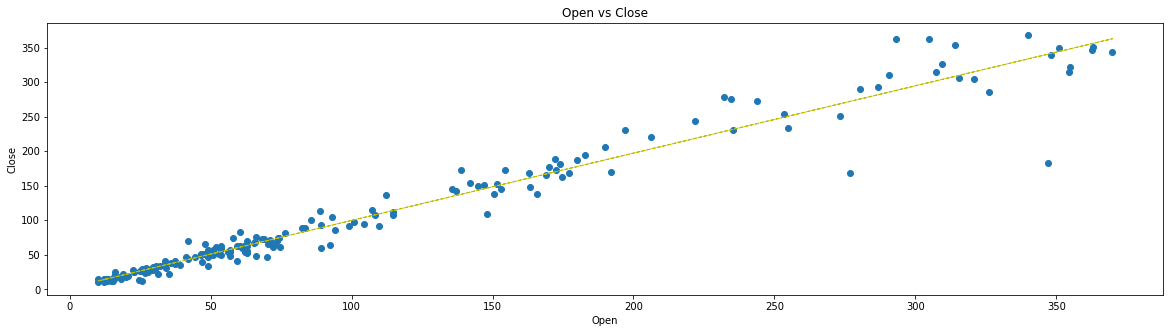

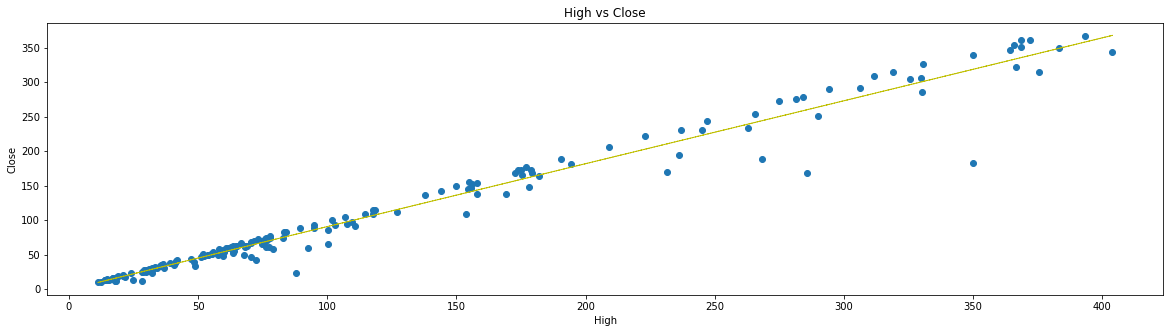

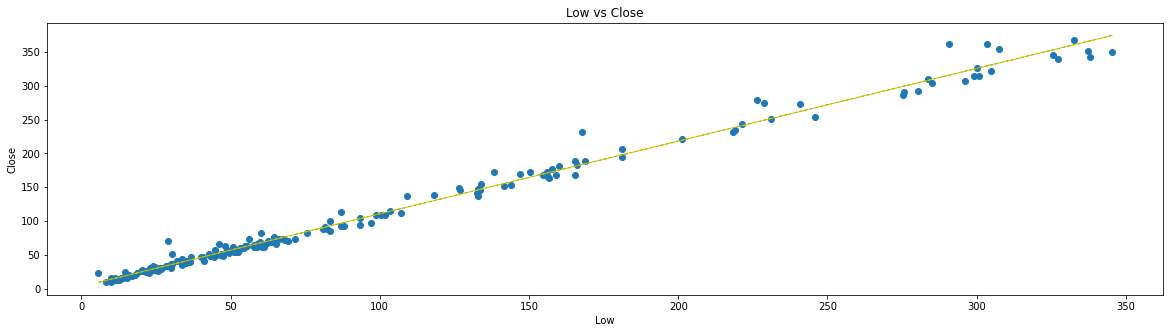

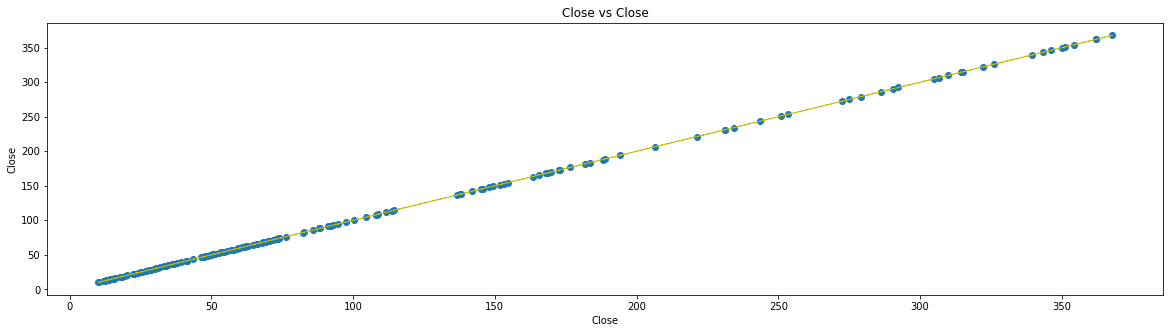

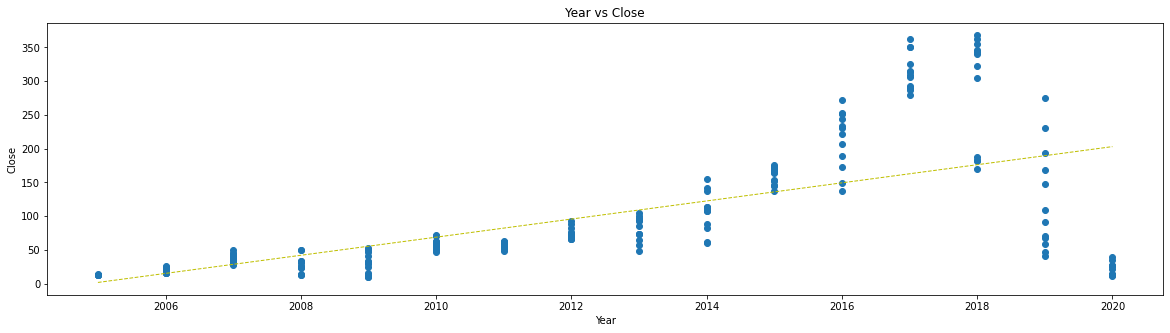

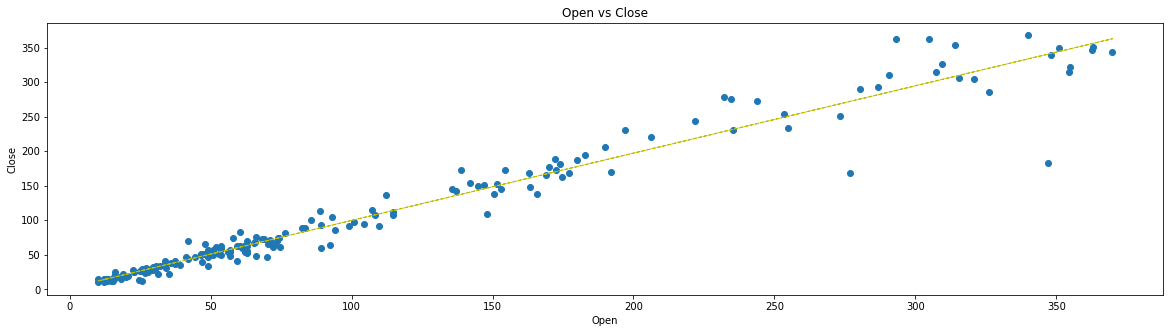

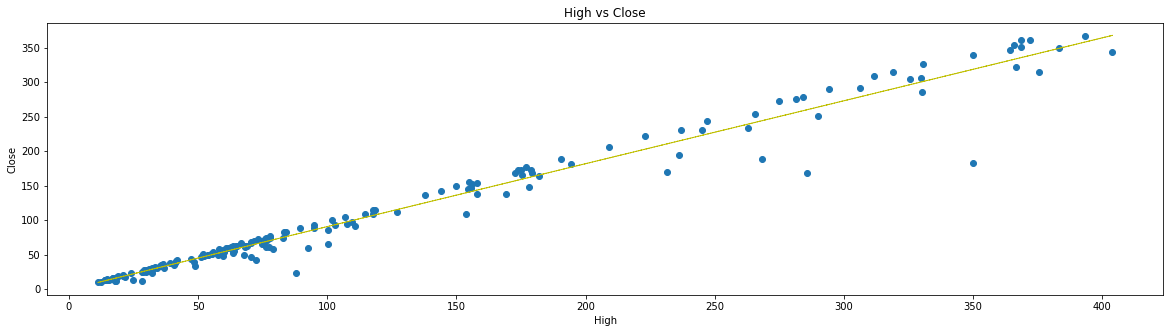

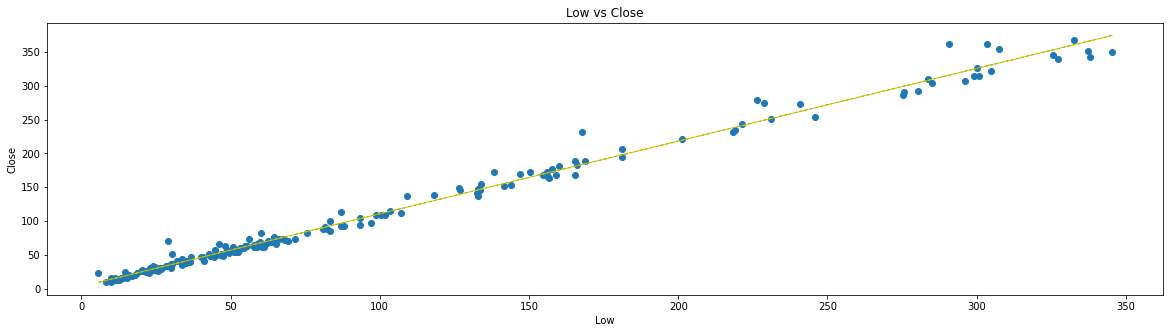

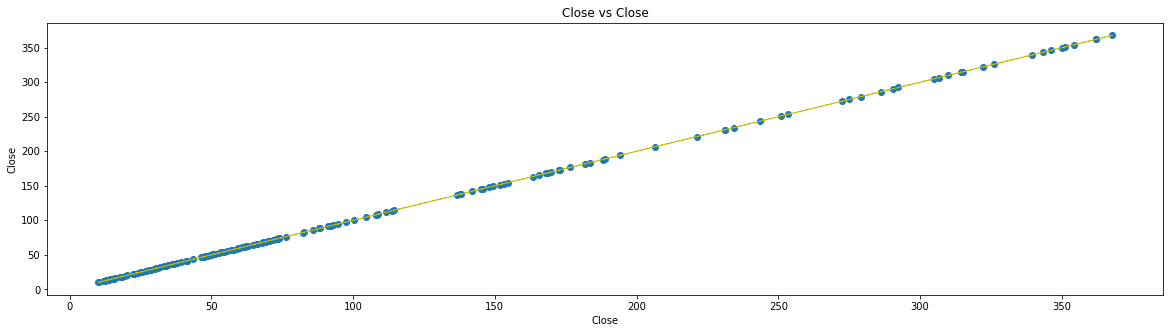

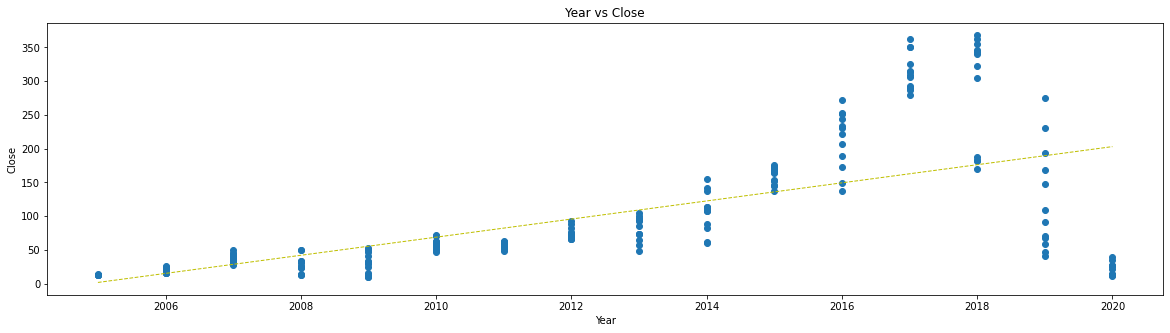

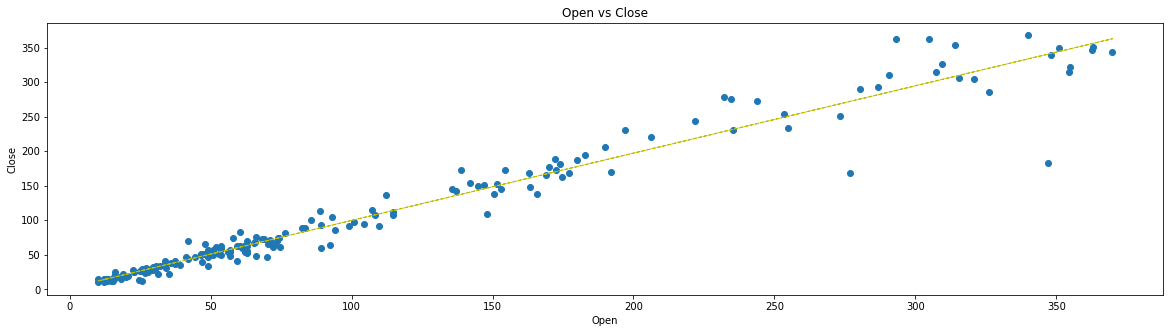

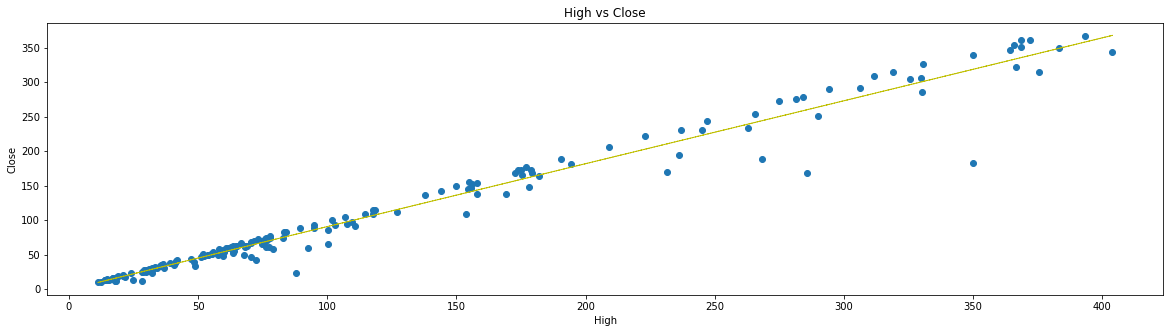

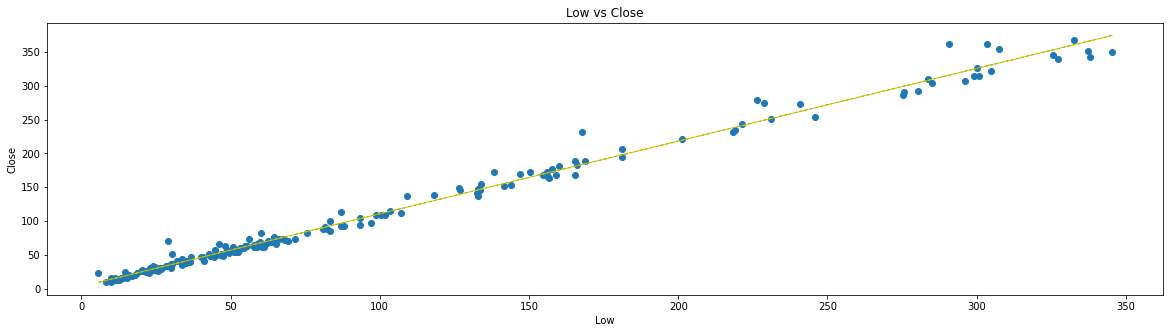

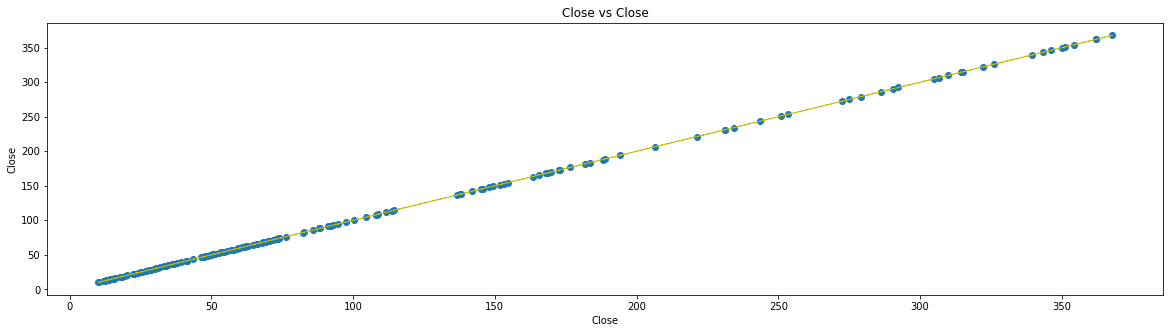

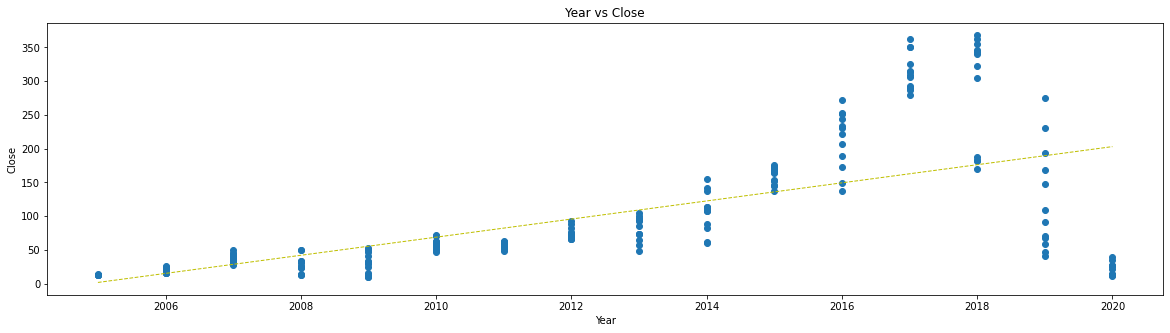

In [ ]:
# Relationship between dependent and independent variable
for col in independent_variables:

 for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "y--", lw=1)
  plt.show()

From the above scatter plots we can see that independent variables are highly correlated to dependent variables and have the linear relationship.

<AxesSubplot:>

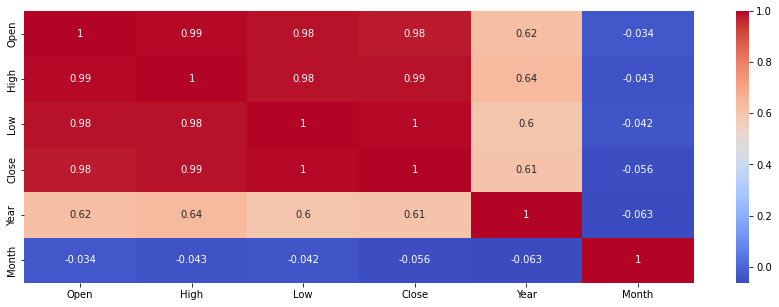

In [ ]:
# Correlation among all variables 
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True,cmap='coolwarm')

As shown in the heatmap we can see that there is high correlation between each pair of data set. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally not have high correlation with one another.This causes a issue as multicolinearity is a problem for our models.

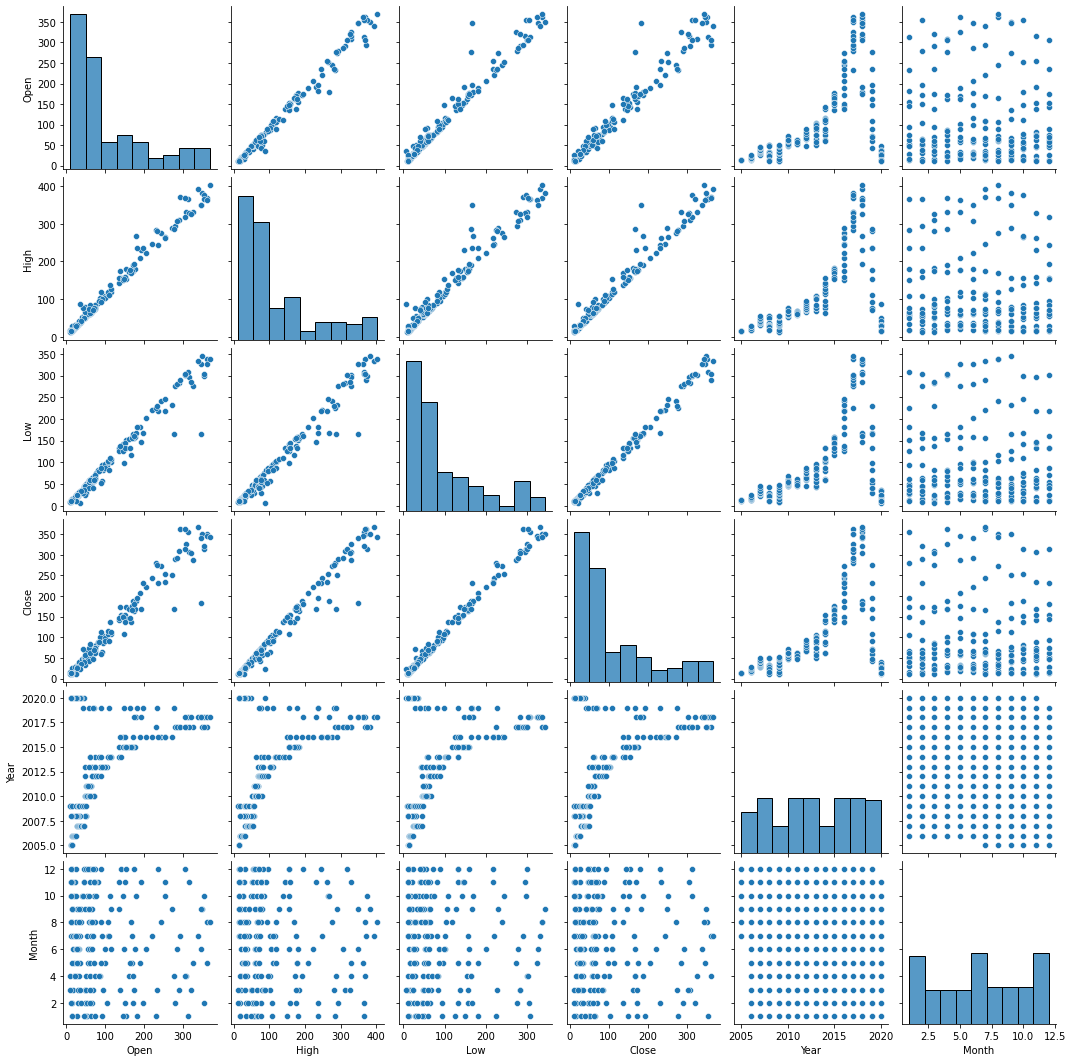

In [ ]:
#Visualize the relationship between each pair of variables using pairplots.
sns.pairplot(df)

In [ ]:
# VIF (Variation Inflation Factor) Analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,176.698461
1,High,174.858810
2,Low,72.263533
3,Year,6.140263
4,Month,4.682766


From the above data we can see that Vif values are very high. But as the dataset is small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information. 

In [ ]:
df.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


In [ ]:
# 5 fold time-series cross-validation 

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:

def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test
   

In [ ]:
# choose appropriate dependent and independent variables
#X = df.dropna().drop(['Close'], 1)
#y = df.dropna().drop(['Date','Open','High','Low'], 1)

y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)


# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
df['Date']
     

     

(148, 2)
(37, 2)
(148,)
(37,)


0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
df.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


# **Linear Regression**

In [ ]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)





In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)


0.7324386174794807

In [ ]:
lr.intercept_

-40712.4510125508

In [ ]:

lr.coef_

array([20.28338764,  1.73496195])

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([218.22643163, 219.96139358, 221.16019977, 222.89516172,
       224.63012367, 226.36508562, 228.10004757, 229.83500951,
       231.56997146, 233.30493341, 235.03989536, 236.77485731,
       238.50981926, 240.24478121, 241.4435874 , 243.17854935,
       244.9135113 , 246.64847325, 248.3834352 , 250.11839715,
       251.8533591 , 253.58832105, 255.323283  , 257.05824495,
       258.7932069 , 260.52816885, 261.72697504, 263.46193699,
       265.19689894, 266.93186089, 268.66682284, 270.40178479,
       272.13674674, 273.87170869, 275.60667064, 277.34163259,
       279.07659454])